## <center>Exercises 11: Neural Networks for regression problems</center>

In this notebook we are going to use neural networks to solve regression problems. Given a dataset and an appropriate fitting function depending on some parameters, facing a regression problem means that we are looking for the values of the parameters that describe best the behaviour of our dataset. Namely, given some noisy data $(x_i,y_i)$ that can be fitted with a function $y=f_{\alpha}(x)$, we are interested in finding the best parameters $\alpha$ for the data.
<br>In the context of machine learning there are some steps we have to follow:
- we have to divide our dataset $(x_i,y_i)$ into a training dataset and a validation dataset, the first one will be used to train our neural network and the second one to test its effectiveness; this division is necessary because the aim of machine learning is to make accurate predictions on unknown data
- now we can build a suitable neural network and adjust its parameters to the problem
- we train the neural network on the training dataset, monitoring its loss function; the loss function is similar to a cost function that needs to be optimized and represents the ability of the network to predict new data, and the type of function we are going to use is the mean square error, that gives an idea of the difference between the predictions and true data
- we test the neural network on the validation dataset and try to make predictions, again monitoring the loss function in order to judge the performance of our model; the mean square error loss function on the test dataset is
$$
MSE= \frac{1}{N_\mathrm{test}}\sum_{j=1}^{N_\mathrm{test}} (y_j^\mathrm{pred}-y_j)^2
$$

Throughout these exercise we will learn how the structure of a neural network affects its performance, building the network and choosing its parameters in different ways. The parameters of the network we are going to work on are:
- the number of layers and neurons per layer and the activation function of each layer
- the optimizer that minimizes the loss function
- the number of epochs; in fact, we are going to divide our dataset in epochs in order to make the training more efficient
- the number of training points

Given the fitting function $y=f_{\alpha}(x)$, we will generate our datasets adding a gaussian noise to the function: the standard deviation $\sigma$ of this noise is another parameter we are going to work on.

### Exercise 1

Here we are going to fit a linear function
$$f(x)=2x+1$$
and build the neural network trying different numbers of epochs $N_{\mathrm{epochs}}$, training data points $N_{\mathrm{train}}$ and noise $\sigma$.
<br>To do so, we first need to define the ideal parameters of the function and a set of target data that describe the exact ideal function. We are now imagining a fixed number $N_{train}$ of training points.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

In [33]:
#ideal parameters of the function
m = 2   #angular coefficient
b = 1   #intercept

#generating training input data
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 1000)   #to train
x_valid = np.random.uniform(-1, 1, 50)    #to test
x_valid.sort()

#ideal linear function
y_target = m * x_valid + b

We now generate a set of input data differing from the ideal behaviour using a gaussian noise with standard deviation $\sigma$. We'll see what happens for three different values of $\sigma$. The figure below shows the target fitting function and the three validation datasets given by the three values of $\sigma$.

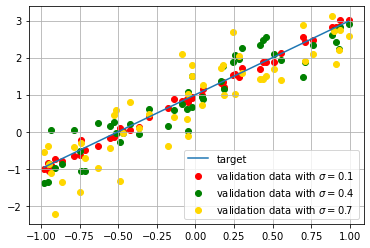

In [34]:
sigma_01 = 0.1   #noise standard deviation
sigma_04 = 0.4
sigma_07 = 0.7

#set of real input data, made from the ideal ones adding a gaussian noise
y_train_01 = np.random.normal(m * x_train + b, sigma_01) # actual measures from which we want to guess regression parameters
y_valid_01 = np.random.normal(m * x_valid + b, sigma_01)

y_train_04 = np.random.normal(m * x_train + b, sigma_04) # actual measures from which we want to guess regression parameters
y_valid_04 = np.random.normal(m * x_valid + b, sigma_04)

y_train_07 = np.random.normal(m * x_train + b, sigma_07) # actual measures from which we want to guess regression parameters
y_valid_07 = np.random.normal(m * x_valid + b, sigma_07)


#plotting validation data and target (ideal data) to visualize the data we have to fit
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid_01, color='red', label='validation data with $\sigma=0.1$')
plt.scatter(x_valid, y_valid_04, color='green', label='validation data with $\sigma=0.4$')
plt.scatter(x_valid, y_valid_07, color='gold', label='validation data with $\sigma=0.7$')
plt.legend()
plt.grid(True)
plt.show()

Now we are going to prepare our neural network. We can use just one layer composed of one neuron: with a linear activation function, in fact, one neuron is able to predict our linear function.
For this exercise we will keep a mean square error loss function and a stochastic gradient descent optimizer.
<br>Then we can train our neural network giving it as input the true dataset $(x_{train},y_{train})$; from this dataset the optimizer is going to find the best weights (the angular coefficient and the intercept of the line) to minimize the loss function. We are going to use $100$ epochs and show the model validation loss as a function of the number of epochs for the three different values of $\sigma$. We will create three models, one for each value of $\sigma$. Below we will print a summary of the structure of our three models.

In [5]:
# compose the NN model

# sigma=0.1

model_01 = tf.keras.Sequential()
model_01.add(Dense(1, input_shape=(1,)))  # 1 neuron with 1 object as input

# compile the model choosing optimizer, loss and metrics objects
model_01.compile(optimizer='sgd', loss='mse', metrics=['mse'])

# get a summary of our composed model (the 2 parameters are the angular coefficient and the intercept)
model_01.summary()

# fit the model using training dataset (over 10 epochs of 32 batch size each)
# then report training progress against validation data
history_01 = model_01.fit(x=x_train, y=y_train_01, 
          batch_size=32, epochs=100,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid_01), verbose=0)


# sigma=0.4

model_04 = tf.keras.Sequential()
model_04.add(Dense(1, input_shape=(1,)))  # 1 neuron with 1 object as input

# compile the model choosing optimizer, loss and metrics objects
model_04.compile(optimizer='sgd', loss='mse', metrics=['mse'])

# get a summary of our composed model (the 2 parameters are the angular coefficient and the intercept)
model_04.summary()

# fit the model using training dataset (over 10 epochs of 32 batch size each)
# then report training progress against validation data
history_04 = model_04.fit(x=x_train, y=y_train_04, 
          batch_size=32, epochs=100,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid_04), verbose=0)


# sigma=0.7

model_07 = tf.keras.Sequential()
model_07.add(Dense(1, input_shape=(1,)))  # 1 neuron with 1 object as input

# compile the model choosing optimizer, loss and metrics objects
model_07.compile(optimizer='sgd', loss='mse', metrics=['mse'])

# get a summary of our composed model (the 2 parameters are the angular coefficient and the intercept)
model_07.summary()

# fit the model using training dataset (over 10 epochs of 32 batch size each)
# then report training progress against validation data
history_07 = model_07.fit(x=x_train, y=y_train_07, 
          batch_size=32, epochs=100,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid_07), verbose=0)

# verbose=0 do not display tracking, =1 do display tracking

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)      

As follows we are printing the weights and biases, that, as we only have one layer, represent the effective optimized parameters of the fitting function; we are also printing the final computation of test loss and accuracy on the validation datasets and then look into the history of each model showing how the loss function behaves while increasing the number of epochs.

In [14]:
#printing weights and biases: w1 represents m and the bias represents b (f(x)=w1*x+b), but only if we have 1 layer
print(r'Model with $\sigma=0.1$')
weights_01 = model_01.get_weights()
print('a=',weights_01[0])
print('b=',weights_01[1])
print()
print(r'Model with $\sigma=0.4$')
weights_04 = model_04.get_weights()
print('a=',weights_04[0])
print('b=',weights_04[1])
print()
print(r'Model with $\sigma=0.7$')
weights_07 = model_07.get_weights()
print('a=',weights_07[0])
print('b=',weights_07[1])
print()

Model with $\sigma=0.1$
a= [[1.9962957]]
b= [1.0036663]

Model with $\sigma=0.4$
a= [[2.0036163]]
b= [0.9847812]

Model with $\sigma=0.7$
a= [[2.0287201]]
b= [0.97649753]



In [10]:
# evaluate model
score_01 = model_01.evaluate(x_valid, y_valid_01, batch_size=32, verbose=0)
score_04 = model_04.evaluate(x_valid, y_valid_04, batch_size=32, verbose=0)
score_07 = model_01.evaluate(x_valid, y_valid_07, batch_size=32, verbose=0)

# print performance
print(r'Test loss $\sigma=0.1$:', score_01[0])
print(r'Test accuracy $\sigma=0.1$:', score_01[1])
print()
print(r'Test loss $\sigma=0.4$:', score_04[0])
print(r'Test accuracy $\sigma=0.4$:', score_04[1])
print()
print(r'Test loss $\sigma=0.7$:', score_07[0])
print(r'Test accuracy $\sigma=0.7$:', score_07[1])

Test loss $\sigma=0.1$: 0.008433249779045582
Test accuracy $\sigma=0.1$: 0.008433249779045582

Test loss $\sigma=0.4$: 0.1756739467382431
Test accuracy $\sigma=0.4$: 0.1756739467382431

Test loss $\sigma=0.7$: 0.3836935758590698
Test accuracy $\sigma=0.7$: 0.3836935758590698


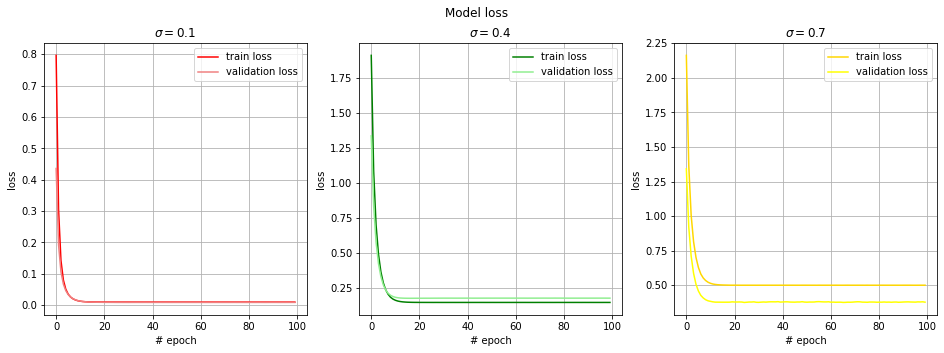

In [25]:
# look into training history
# Plot training & validation loss values for each value of sigma

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,5))
fig.suptitle('Model loss')

ax1.plot(history_01.history['loss'],color='red',label='train loss')
ax1.plot(history_01.history['val_loss'],color='lightcoral',label='validation loss')
ax1.set_xlabel('# epoch')
ax1.set_ylabel('loss')
ax1.set_title('$\sigma=0.1$')
ax1.grid(True)
ax1.legend(loc='best')

ax2.plot(history_04.history['loss'],color='green',label='train loss')
ax2.plot(history_04.history['val_loss'],color='lightgreen',label='validation loss')
ax2.set_xlabel('# epoch')
ax2.set_ylabel('loss')
ax2.set_title('$\sigma=0.4$')
ax2.grid(True)
ax2.legend(loc='best')

ax3.plot(history_07.history['loss'],color='gold',label='train loss')
ax3.plot(history_07.history['val_loss'],color='yellow',label='validation loss')
ax3.set_xlabel('# epoch')
ax3.set_ylabel('loss')
ax3.set_title('$\sigma=0.7$')
ax3.grid(True)
ax3.legend(loc='best')

plt.show()

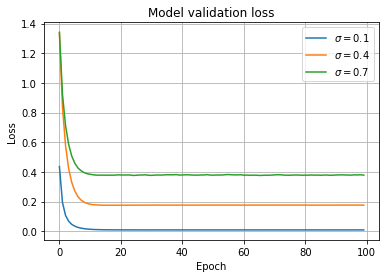

In [20]:
# comparison between the different values of sigma
plt.plot(history_01.history['val_loss'])
plt.plot(history_04.history['val_loss'])
plt.plot(history_07.history['val_loss'])
plt.title('Model validation loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['$\sigma=0.1$', '$\sigma=0.4$', '$\sigma=0.7$'], loc='best')
plt.grid()
plt.show()

The figures above show a comparison of the three values of $\sigma$. We can see that the only value which seems to give reasonable results is the second one, $\sigma=0.4$. If we look at the first set of graphs we can spot an important feature: the validation loss should always lay above the train loss curve, but this is never true for $\sigma=0.1$ and $\sigma=0.7$. Indeed, if the noise is too low ($\sigma=0.1$) the network is not able to generalize the data because it gets too used to the input data (this is called overfitting), whereas if the noise is too high ($\sigma=0.7$) the newtwork cannot fit the data using the input data because they are too sparse (this is called underfitting). 
<br>We can also see that a little number of epochs even in the $\sigma=0.4$ model gives us the same problem. The more we increase this number, the best the model is: the loss decreases exponentially until it reaches a constant value.
<br>I would choose parameters $\sigma=0.4$ or $\sigma=0.3$ for the noise and $N_{epochs}=30$ as the number of epochs.
<br>The plot below graphically shows the predictions based on which we evaluate the performance of the models.

4/4 [==============================] - 0s 0s/step


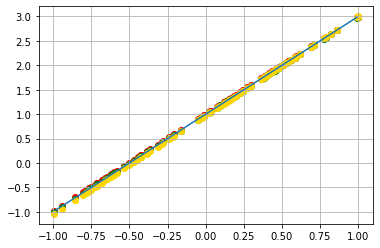

In [35]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted_01 = model_01.predict(x_predicted)
y_predicted_04 = model_04.predict(x_predicted)
y_predicted_07 = model_07.predict(x_predicted)
plt.scatter(x_predicted, y_predicted_01,color='red',label='$\sigma=0.1$')
plt.scatter(x_predicted, y_predicted_04,color='green',label='$\sigma=0.4$')
plt.scatter(x_predicted, y_predicted_07,color='gold',label='$\sigma=0.7$')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.legend(loc='best')
plt.show()

Let us fix $\sigma=0.4$ and $N_{epochs}=30$. We are now going to create models with different numbers $N_{train}$ of train points and compare them, following the same procedure as before.

In [27]:
x_train_100 = np.random.uniform(-1, 1, 100)   #to train
x_valid_100 = np.random.uniform(-1, 1, 5)    #to test
x_valid_100.sort()
#ideal linear function
y_target_100 = m * x_valid_100 + b
#dataset
y_train_100 = np.random.normal(m * x_train_100 + b, sigma_04) # actual measures from which we want to guess regression parameters
y_valid_100 = np.random.normal(m * x_valid_100 + b, sigma_04)

x_train_10000 = np.random.uniform(-1, 1, 10000)   #to train
x_valid_10000 = np.random.uniform(-1, 1, 500)    #to test
x_valid_10000.sort()
#ideal linear function
y_target_10000 = m * x_valid_10000 + b
#dataset
y_train_10000 = np.random.normal(m * x_train_10000 + b, sigma_04) # actual measures from which we want to guess regression parameters
y_valid_10000 = np.random.normal(m * x_valid_10000 + b, sigma_04)

In [29]:
model_100 = tf.keras.Sequential()
model_100.add(Dense(1, input_shape=(1,)))  # 1 neuron with 1 object as input

# compile the model choosing optimizer, loss and metrics objects
model_100.compile(optimizer='sgd', loss='mse', metrics=['mse'])

# fit the model using training dataset (over 10 epochs of 32 batch size each)
# then report training progress against validation data
history_100 = model_100.fit(x=x_train_100, y=y_train_100, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid_100, y_valid_100), verbose=0)


model_1000 = tf.keras.Sequential()
model_1000.add(Dense(1, input_shape=(1,)))  # 1 neuron with 1 object as input

# compile the model choosing optimizer, loss and metrics objects
model_1000.compile(optimizer='sgd', loss='mse', metrics=['mse'])

# fit the model using training dataset (over 10 epochs of 32 batch size each)
# then report training progress against validation data
history_1000 = model_100.fit(x=x_train, y=y_train_04, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid_04), verbose=0)


model_10000 = tf.keras.Sequential()
model_10000.add(Dense(1, input_shape=(1,)))  # 1 neuron with 1 object as input

# compile the model choosing optimizer, loss and metrics objects
model_10000.compile(optimizer='sgd', loss='mse', metrics=['mse'])

# fit the model using training dataset (over 10 epochs of 32 batch size each)
# then report training progress against validation data
history_10000 = model_10000.fit(x=x_train_10000, y=y_train_10000, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid_10000, y_valid_10000), verbose=0)

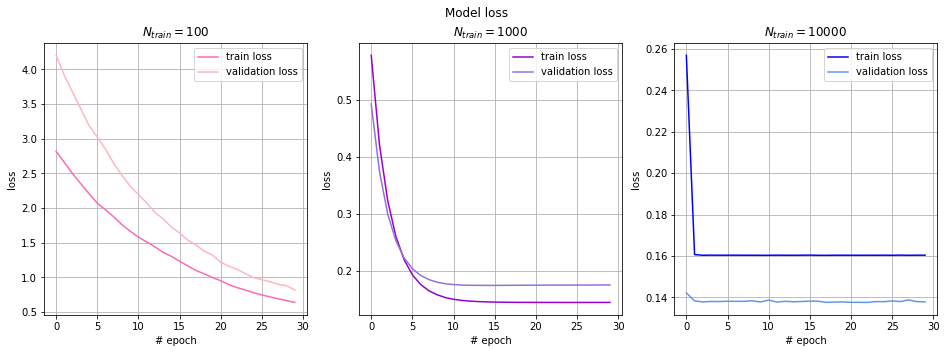

In [30]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,5))
fig.suptitle('Model loss')

ax1.plot(history_100.history['loss'],color='hotpink',label='train loss')
ax1.plot(history_100.history['val_loss'],color='lightpink',label='validation loss')
ax1.set_xlabel('# epoch')
ax1.set_ylabel('loss')
ax1.set_title('$N_{train}=100$')
ax1.grid(True)
ax1.legend(loc='best')

ax2.plot(history_1000.history['loss'],color='darkviolet',label='train loss')
ax2.plot(history_1000.history['val_loss'],color='mediumpurple',label='validation loss')
ax2.set_xlabel('# epoch')
ax2.set_ylabel('loss')
ax2.set_title('$N_{train}=1000$')
ax2.grid(True)
ax2.legend(loc='best')

ax3.plot(history_10000.history['loss'],color='blue',label='train loss')
ax3.plot(history_10000.history['val_loss'],color='cornflowerblue',label='validation loss')
ax3.set_xlabel('# epoch')
ax3.set_ylabel('loss')
ax3.set_title('$N_{train}=10000$')
ax3.grid(True)
ax3.legend(loc='best')

plt.show()

Observing the graphs above we can see that the only reasonable behaviour is the one shown by $N_{train}=1000$, where after $\approx5$ epochs the validation loss gets higher than the train loss and they are approximately constant. The model trained with $N_{train}=100$ points has not reached constant values yet and will probably end up in the condition of a train loss higher than the validation loss, as the model with $N_{train}=10000$ points does: in the first case the reason is that we have not generated enough points for the network to be trained properly (underfitting), in the latter case the reason is that we have generated too many points (overfitting). Therefore I would choose $N_{train}\approx1000$.

### Exercise 2

Now we can try to extend the model in order to fit a polynomial function
$$
f(x)=4-3x-2x^2+3x^3
$$
for $x \in [-1,1]$.
<br> Following the same procedure as before, we are going to generate $N_{train}=10000$ points distributed along the polynomial with a gaussian noise of standard deviation $\sigma=0.4$. The training dataset needs to be numerous: with a little number of training points the ability of the model to make predictions fails and we risk overfitting.
<br> The graph below shows the validation dataset in comparison with the fitting function.

In [4]:
#ideal parameters of the function
a = 4   
b = -3   
c = -2
d = 3

#range of training
xmin_train = -1.0
xmax_train = 1.0

#difference between range of testing and range of training
diff_test = 0.0

#range of testing
xmin_test = xmin_train - diff_test
xmax_test = xmax_train + diff_test

#generating training input data
np.random.seed(0)
x_train = np.random.uniform(xmin_train, xmax_train, 10000)   #to train
x_valid = np.random.uniform(xmin_test, xmax_test, 50)    #to test
x_valid.sort()

#ideal linear function
y_target = a + b * x_valid + c * x_valid**2 + d * x_valid**3

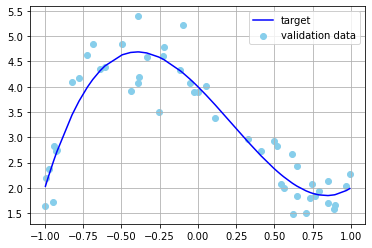

In [5]:
sigma = 0.4   #noise standard deviation

#set of real input data, made from the ideal ones adding a gaussian noise
y_train = np.random.normal(a + b * x_train + c * x_train**2 + d * x_train**3, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(a + b * x_valid + c * x_valid**2 + d * x_valid**3, sigma)

#plotting validation data and target (ideal data) to visualize the data we have to fit
plt.plot(x_valid, y_target, color='blue', label='target')
plt.scatter(x_valid, y_valid, color='skyblue', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

For this purpose I built different models and explored how the behaviour of the neural network depends on its structure. In particular the aspects I tried to modify are the number of layers, their activation function, the number of neurons in each layer, the optimizer and the loss function.

Being the fitting function non linear, we need more than one layer in our network, that's why we are going to add some hidden layers to the structure described in the previous exercise. As for the structure of these hidden layers, I learned that the network works better if they are made of multiple neurons instead of one. The more the neurons are the better it works, until at some point it starts failing completely (it predicts a straight horizontal line). The best architecture I found consists of a little number of hidden layers (if they are too many it fails again) with a decrease of the number of neurons from the input layer to the output layer: for example a good architecture could be 4 hidden layes with 20, 10, 5, 1 neurons each respectively; the number of neurons should not differ too much from one to another and should not be too little. Looking into the history of the model, I noticed that with such a structure the validation loss decreases, whereas it increases when the layers are too many.
<br> The best activation function for hidden layers seems to be the ReLU activation function, which overcomes the problem of the vanishing gradient we have with other activation functions such as the sigmoid or the hyperbolic tangent.
<br> The best optimizers seem to be the stochastic gradient descent or the Adam optimizer: in particular, the validation loss with an Adam optimizer converges to a constant value before the case of a stochastic gradient descent optimizer.
<br> As a loss function I chose to use the mean squared error, but also the mean absolute error could be fine.
<br> The output layer, since this is a regression problem, has to consist of one neuron with a linear activation function: this has to stay unchanged with any architecture used.

After building each model, I checked it on the validation dataset and tried to make predictions both inside and outside the training domain for $x$. Even when the model makes the best predictions inside the training domain, out of this range it always makes mistakes: it predicts new data following the behaviour of the data in the training range (for example when the traning range stops on a slope of the polynomial the model predicts a continuation of the slope).

### Exercise 3
  
After understanding how the structure of a neural network affects its performance, we are going to build a model in order to fit a 2D function
$$f(x,y) = \sin(x^2+y^2)$$ 
in the range $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$.
<br> I tried three different models, changing the number of hidden layers and the optimizer. The features they have in common are the input shape of the first layer (that is 2 because we have both $x$ and $y$ data as input), the activation functions (ReLU for hidden layers, linear for the output layer), the loss and metrics functions (MSE) and the output layer (composed of one neuron because we only need one number as the output when we deal with regression problems).
<br> The training and validation datasets are the same for all three models. The number of training points is very high in order not to get stuck in a condition of overfitting. Through some initial attempts, in fact, I have learnt that if the number of training data is too little the model can go through overfitting and show a validation loss which is lower than the train loss; the same can happen if the number of epochs or the number of layers is too big.
<br> We start by generating the training and validation datasets with the same procedure used in the previous exercises.

In [3]:
xmin = -3.0/2.0
xmax = 3.0/2.0
ymin = -3.0/2.0
ymax = 3.0/2.0

# generating training data
np.random.seed(0)
n_train = 10000
x_train = np.random.uniform(xmin, xmax, n_train)
y_train = np.random.uniform(ymin, ymax, n_train)
z_target = np.sin(x_train**2 + y_train**2)

# generating validation data
n_test = 50
x_test = np.random.uniform(xmin, xmax, n_test)
y_test = np.random.uniform(ymin, ymax, n_test)
z_test = np.sin(x_test**2 + y_test**2)

# adding gaussian noise
sigma = 0.1   #noise standard deviation
z_train = np.random.normal(z_target, sigma) # actual measures from which we want to guess regression parameters
z_valid = np.random.normal(z_test, sigma)

#### Model 1: one hidden layer and Adam optimizer

The first model we are going to work with has a simple architecture: it consists of just one hidden layer with $30$ neurons.
<br> As we have done previously, we are now training the model and then testing it on the validation dataset. We are going to print the final values of test loss and accuracy in order to quantify the ability of the network to perform.

In [4]:
# building the model
model = tf.keras.Sequential()

# hidden layers
model.add(Dense(30, activation='relu', input_shape=(2,)))  # 2 neurons for bidimensional input (x,y)

# output layer --> activation function for regression = linear
model.add(Dense(1))  # 1 neuron for the output

# choosing optimizer, loss, metrics
model.compile(optimizer='adam', loss='mse', metrics='mse')

# training the model --> np.column_stack makes a n_trainx2 matrix with 2 columns (1 for x and 1 for y)
#history = model.fit(x=np.column_stack((x_train, y_train)), y=z_train, epochs=50, batch_size=32, shuffle=True,
#                    validation_data=(np.column_stack((x_test, y_test)), z_test), verbose=0)
history = model.fit(x=np.column_stack((x_train, y_train)), y=z_train, epochs=50, batch_size=32, shuffle=True,
                    validation_data=(np.column_stack((x_test, y_test)), z_valid), verbose=0)
print("Network trained!")

Network trained!


In [5]:
# evaluating the model with validation data
score = model.evaluate(x=np.column_stack((x_test, y_test)), y=z_test, batch_size=32, verbose=0)
print("Model evaluated with validation data!")

# printing performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model evaluated with validation data!

Test loss: 0.005252992734313011
Test accuracy: 0.005252992734313011


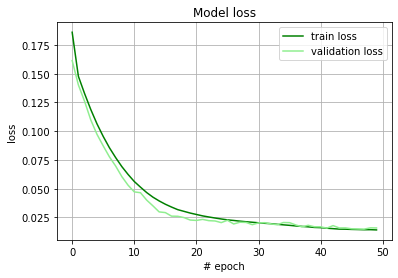

In [6]:
plt.plot(history.history['loss'],color='green',label='train loss')
plt.plot(history.history['val_loss'],color='lightgreen',label='validation loss')
plt.xlabel('# epoch')
plt.ylabel('loss')
plt.title('Model loss')
plt.grid(True)
plt.legend(loc='best')

In the figure above we are looking at the validation and train loss throughout the history of the model. The validation loss should always be bigger than the train loss; here this happens approximately when we reach constant values of the two losses, which seem to be very similar. This behaviour doesn't change if we change the number of neutrons in the layer, and it could suggest a risk of overfitting.
<br> Now we can predict some new data to see how well the model performs. To visualize the accuracy of the predictions in two dimensions, in the following plot we are going to put the true values of $f$ on the $x$ axis and the predicted values of $f$ on the $y$ axis, so the scattered points should lie along the line $y=x$ as the quantities that these two coordinates represent should ideally be the same.

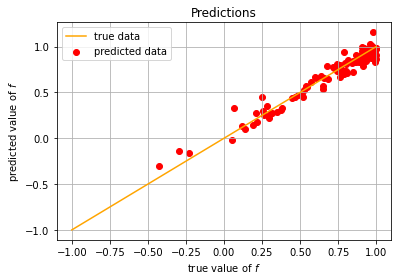

In [7]:
# predicting new data
x_pred = np.random.uniform(xmin, xmax, 100)
y_pred = np.random.uniform(ymin, ymax, 100)
z_predicted = model.predict(x=np.column_stack((x_pred, y_pred)), verbose=0)

# true data
z_true = np.sin(x_pred**2+y_pred**2)

# comparing predicted data and true data
plt.scatter(z_true, z_predicted, color='red', label='predicted data')

x = np.linspace(-1,1)
y = x
plt.plot(x, y, color='orange', label='true data')  # as I am plotting true values on x axis and predictions on y axis, the more these points are along the line y=x the best is the network

plt.xlabel(r'true value of $f$')
plt.ylabel(r'predicted value of $f$')
plt.title('Predictions')
plt.grid(True)
plt.legend(loc='best')
plt.show()

#### Model 2: multiple hidden layers and Adam optimizer

Here we want to try a deeper architecture: we have 4 hidden layers made up of decreasing numbers of neurons, respectively $30$, $20$, $10$, $5$. We now follow the same procedure as before.

In [8]:
# building the model
model1 = tf.keras.Sequential()

# hidden layers
model1.add(Dense(30, activation='relu', input_shape=(2,)))  # 2 neurons for bidimensional input (x,y)
model1.add(Dense(20, activation='relu'))
model1.add(Dense(10, activation='relu'))
model1.add(Dense(5, activation='relu'))

# output layer --> activation function for regression = linear
model1.add(Dense(1))  # 1 neuron for the output

# choosing optimizer, loss, metrics
model1.compile(optimizer='adam', loss='mse', metrics='mse')

# training the model --> np.column_stack makes a n_trainx2 matrix with 2 columns (1 for x and 1 for y)
#history1 = model1.fit(x=np.column_stack((x_train, y_train)), y=z_train, epochs=50, batch_size=32, shuffle=True,
#                    validation_data=(np.column_stack((x_test, y_test)), z_test), verbose=0)
history1 = model1.fit(x=np.column_stack((x_train, y_train)), y=z_train, epochs=50, batch_size=32, shuffle=True,
                    validation_data=(np.column_stack((x_test, y_test)), z_valid), verbose=0)
print("Network trained!")

Network trained!


In [9]:
# evaluating the model with validation data
score1 = model1.evaluate(x=np.column_stack((x_test, y_test)), y=z_test, batch_size=32, verbose=0)
print("Model evaluated with validation data!")

# printing performance
print()
print('Test loss:', score1[0])
print('Test accuracy:', score1[1])

Model evaluated with validation data!

Test loss: 0.0017941886326298118
Test accuracy: 0.0017941886326298118


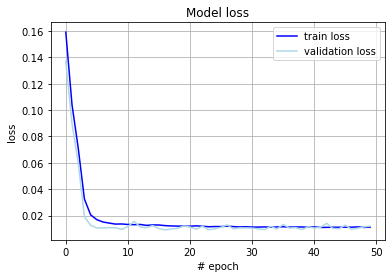

In [10]:
plt.plot(history1.history['loss'],color='blue',label='train loss')
plt.plot(history1.history['val_loss'],color='lightblue',label='validation loss')
plt.xlabel('# epoch')
plt.ylabel('loss')
plt.title('Model loss')
plt.grid(True)
plt.legend(loc='best')

As we look into the history of the model above, we can see that here the validation loss is almost always higher than the train loss, and the constant value is reached way before the case of model $1$. The final value of the validation loss reached with this model is lower than the one reached with model $1$.
<br> We are now going to show predictions of new data using the same type of graph we have used for the previous model.

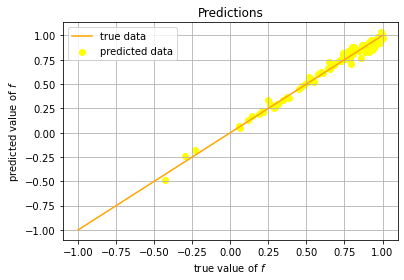

In [11]:
# predicting new data
z_predicted1 = model1.predict(x=np.column_stack((x_pred, y_pred)), verbose=0)

# comparing predicted data and true data
plt.scatter(z_true, z_predicted1, color='yellow', label='predicted data')

plt.plot(x, y, color='orange', label='true data')  # as I am plotting true values on x axis and predictions on y axis, the more these points are along the line y=x the best is the network

plt.xlabel(r'true value of $f$')
plt.ylabel(r'predicted value of $f$')
plt.title('Predictions')
plt.grid(True)
plt.legend(loc='best')
plt.show()

#### Model 3: multiple hidden layers and SGD optimizer

Finally we are building a model with the same architecture as the previous one, but with a different optimizer, the stochastic gradient descent optimizer.

In [12]:
# building the model
model2 = tf.keras.Sequential()

# hidden layers
model2.add(Dense(30, activation='relu', input_shape=(2,)))  # 2 neurons for bidimensional input (x,y)
model2.add(Dense(20, activation='relu'))
model2.add(Dense(10, activation='relu'))
model2.add(Dense(5, activation='relu'))

# output layer --> activation function for regression = linear
model2.add(Dense(1))  # 1 neuron for the output

# choosing optimizer, loss, metrics
model2.compile(optimizer='sgd', loss='mse', metrics='mse')

# training the model --> np.column_stack makes a n_trainx2 matrix with 2 columns (1 for x and 1 for y)
#history2 = model2.fit(x=np.column_stack((x_train, y_train)), y=z_train, epochs=50, batch_size=32, shuffle=True,
#                    validation_data=(np.column_stack((x_test, y_test)), z_test), verbose=0)
history2 = model2.fit(x=np.column_stack((x_train, y_train)), y=z_train, epochs=50, batch_size=32, shuffle=True,
                    validation_data=(np.column_stack((x_test, y_test)), z_valid), verbose=0)
print("Network trained!")

Network trained!


In [13]:
# evaluating the model with validation data
score2 = model2.evaluate(x=np.column_stack((x_test, y_test)), y=z_test, batch_size=32, verbose=0)
print("Model evaluated with validation data!")

# printing performance
print()
print('Test loss:', score2[0])
print('Test accuracy:', score2[1])

Model evaluated with validation data!

Test loss: 0.0003943188057746738
Test accuracy: 0.0003943188057746738


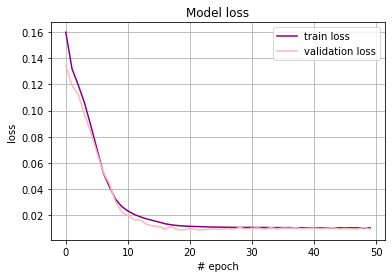

In [14]:
plt.plot(history2.history['loss'],color='purple',label='train loss')
plt.plot(history2.history['val_loss'],color='lightpink',label='validation loss')
plt.xlabel('# epoch')
plt.ylabel('loss')
plt.title('Model loss')
plt.grid(True)
plt.legend(loc='best')

In this case we can see that the two loss functions converge to a constant value way after the case of model $2$, whereas the final value reached is lower.

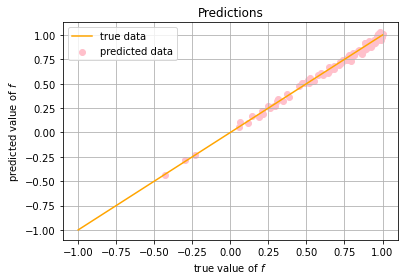

In [15]:
# predicting new data
z_predicted2 = model2.predict(x=np.column_stack((x_pred, y_pred)), verbose=0)

# comparing predicted data and true data
plt.scatter(z_true, z_predicted2, color='pink', label='predicted data')

plt.plot(x, y, color='orange', label='true data')  # as I am plotting true values on x axis and predictions on y axis, the more these points are along the line y=x the best is the network

plt.xlabel(r'true value of $f$')
plt.ylabel(r'predicted value of $f$')
plt.title('Predictions')
plt.grid(True)
plt.legend(loc='best')
plt.show()

#### Comparison between the models

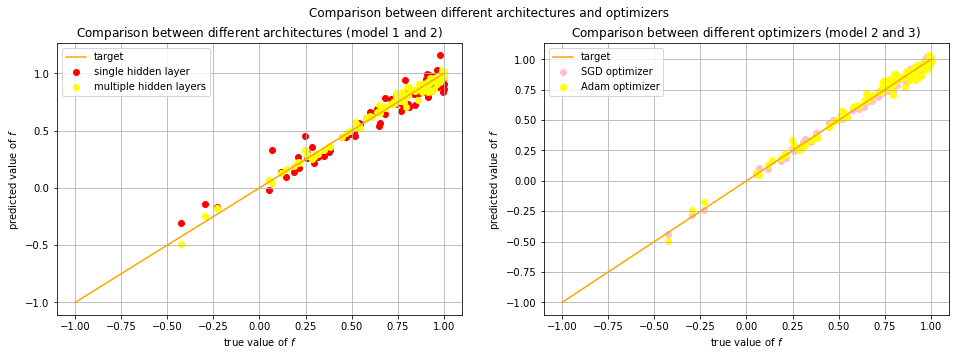

In [16]:
# comparing the predictions of the models

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,5))
fig.suptitle('Comparison between different architectures and optimizers')

ax1.scatter(z_true, z_predicted, color='red', label='single hidden layer')
ax1.scatter(z_true, z_predicted1, color='yellow', label='multiple hidden layers')
ax1.plot(x, y, color='orange', label='target')
ax1.set_xlabel(r'true value of $f$')
ax1.set_ylabel(r'predicted value of $f$')
ax1.set_title(r'Comparison between different architectures (model $1$ and $2$)')
ax1.grid(True)
ax1.legend(loc='best')

ax2.scatter(z_true, z_predicted2, color='pink', label='SGD optimizer')
ax2.scatter(z_true, z_predicted1, color='yellow', label='Adam optimizer')
ax2.plot(x, y, color='orange', label='target')
ax2.set_xlabel(r'true value of $f$')
ax2.set_ylabel(r'predicted value of $f$')
ax2.set_title(r'Comparison between different optimizers (model $2$ and $3$)')
ax2.grid(True)
ax2.legend(loc='best')

plt.show()

The figure above shows a comparison between the predictions made by the three models: in particular, we are interested in comparing the two different architectures and the two different optimizers, that are represented by models $1$-$2$ and models $2$-$3$ respectively. 
<br> Overall, the best choice of neural network among the previous ones is one of those with multiple hidden layers. In this kind of plot where the true values of $f$ are on the x axis and the predicted values of $f$ are on the y axis, the scattered points should lie along the line $y=x$ as the quantities that these two coordinates represent should ideally be the same. The third model, the one with the Adam optimizer, shows the best behaviour in predicting new data; regarding the validation loss, it converges faster towards a constant value in the second model, the one with the Adam optimizer, and it also has the lowest final value.